<a href="https://colab.research.google.com/github/LakshyaKhatri/ML-Journey/blob/master/Day3/gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent (SDG)
---

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai.basics import *
import matplotlib.pyplot as plt

# Linear Regression Problem
---

In [0]:
n = 100  # Number of data points

In [8]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[ 0.6776,  1.0000],
        [-0.7811,  1.0000],
        [-0.4434,  1.0000],
        [ 0.9114,  1.0000],
        [ 0.6449,  1.0000]])

actual value of a1 and a2 is 3 and 2

In [0]:
a = tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

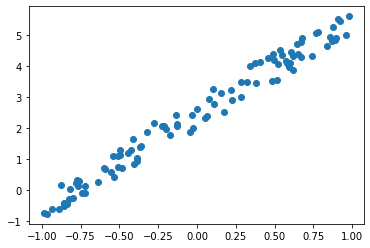

In [13]:
plt.scatter(x[:,0], y)

In [0]:
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

let a1 and a2 be 1.0, then y_hat will be the prediction

In [0]:
a = tensor(1., 1)

In [0]:
y_hat = x@a

In [18]:
mse(y_hat, y)

tensor(3.8176)

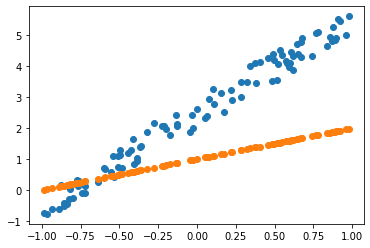

In [19]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

# Gradient Descent
---

In [37]:
# start with the random guess 
a = nn.Parameter(a)
a

Parameter containing:
tensor([1., 1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if i % 10 == 0: print('loss = ', loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()
    if i % 10 == 0: print('a = ', a)

In [38]:
lr = 1e-1
for i in range(100): update()

loss =  tensor(3.8176, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([1.1515, 1.2951], requires_grad=True)
loss =  tensor(0.4578, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([2.1713, 2.3411], requires_grad=True)
loss =  tensor(0.1619, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([2.6549, 2.4475], requires_grad=True)
loss =  tensor(0.0991, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([2.8864, 2.4561], requires_grad=True)
loss =  tensor(0.0847, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([2.9976, 2.4557], requires_grad=True)
loss =  tensor(0.0814, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([3.0509, 2.4550], requires_grad=True)
loss =  tensor(0.0806, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([3.0766, 2.4546], requires_grad=True)
loss =  tensor(0.0805, grad_fn=<MeanBackward0>)
a =  Parameter containing:
tensor([3.0889, 2.4544], requires_grad=True)
loss =  tensor(0.0804, grad_fn=<MeanBack

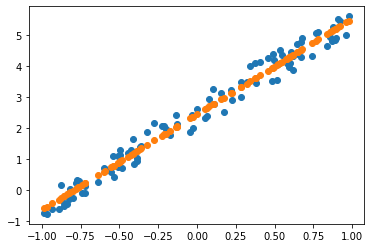

In [39]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], (x@a).detach().numpy())

# Animating things
---

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [44]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach().numpy())
plt.close()

def animate(i):
  update()
  line.set_ydata((x@a).detach().numpy())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)